# Kondratiev Wave

https://en.wikipedia.org/wiki/Kondratiev_wave

[*********************100%***********************]  1 of 1 completed


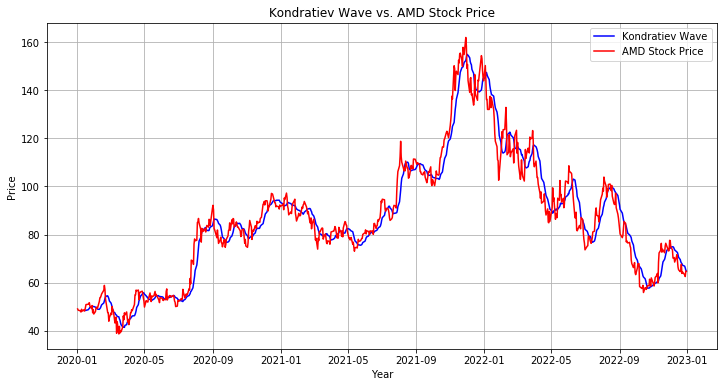

In [1]:
import warnings
warnings.filterwarnings("ignore")

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Input
symbol = 'AMD'
start = '2020-01-01'
end = '2023-01-01'

# Read data
dataset = yf.download(symbol, start, end)

# Prepare data
data = dataset['Adj Close'].values

# Function to calculate the Kondratiev Wave
def calculate_kondratiev_wave(data, cycle_length=10):
    wave = []
    n = len(data)
    
    # Calculate moving averages for the specified cycle length
    for i in range(cycle_length, n):
        moving_average = np.mean(data[i - cycle_length:i])
        wave.append(moving_average)
    
    return wave

# Set the cycle length (e.g., 10 years)
cycle_length = 10

# Calculate the Kondratiev Wave
kondratiev_wave = calculate_kondratiev_wave(data, cycle_length)

# Create a date range for the Kondratiev Wave
date_range = dataset.index[cycle_length:]

# Plot the Kondratiev Wave and stock data
plt.figure(figsize=(12, 6))
plt.plot(date_range, kondratiev_wave, label='Kondratiev Wave', color='blue')
plt.plot(dataset.index, data, label=symbol + ' Stock Price', color='red')
plt.title('Kondratiev Wave vs. ' + symbol + ' Stock Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()